<ipython-input-47-509c4a0b1492>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  DatosIPC.columns = ['Concepto'] + [f"{new_header[i]}" for i in range(1, len(DatosIPC.columns))]
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


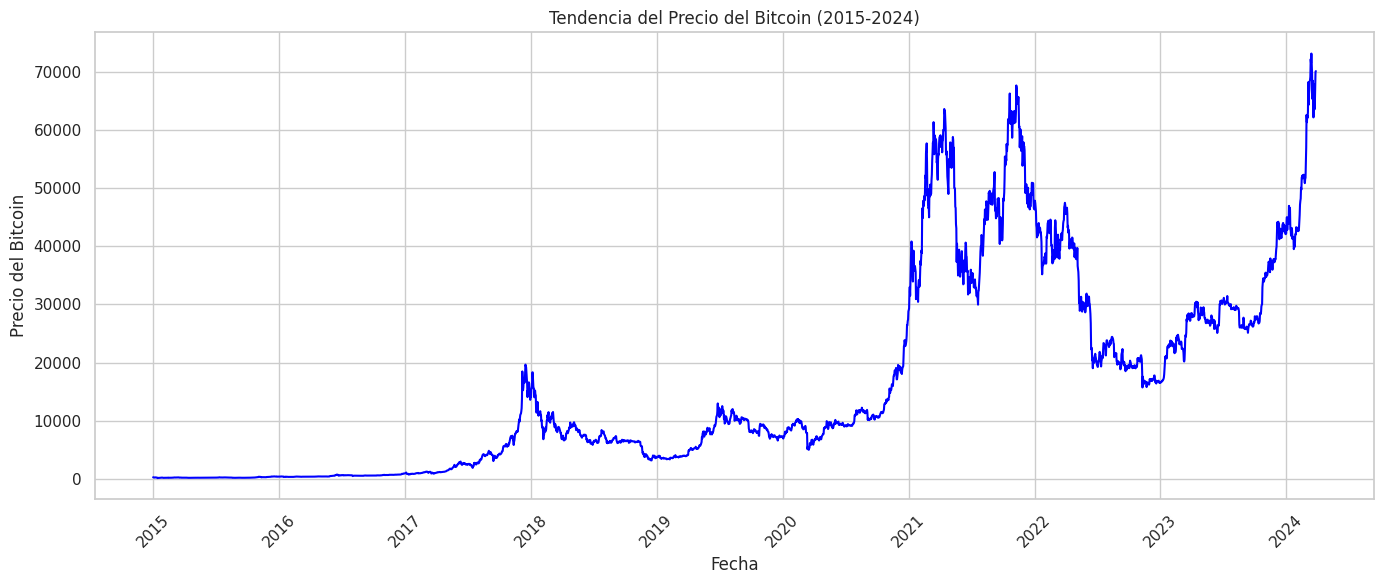

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


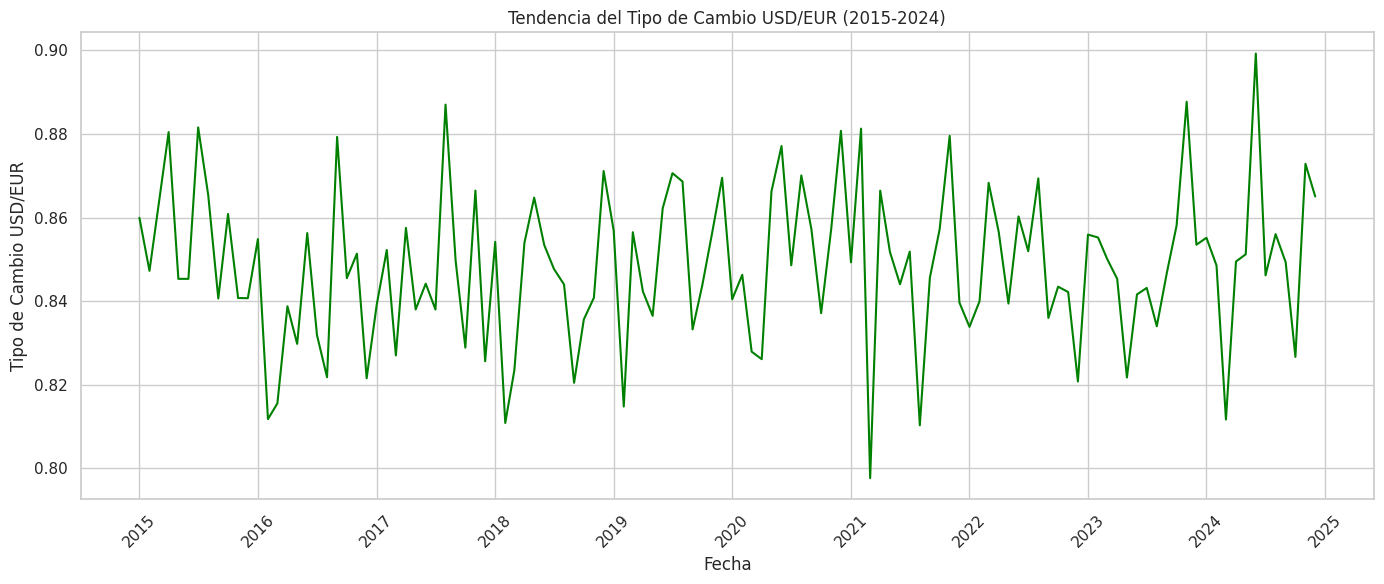

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

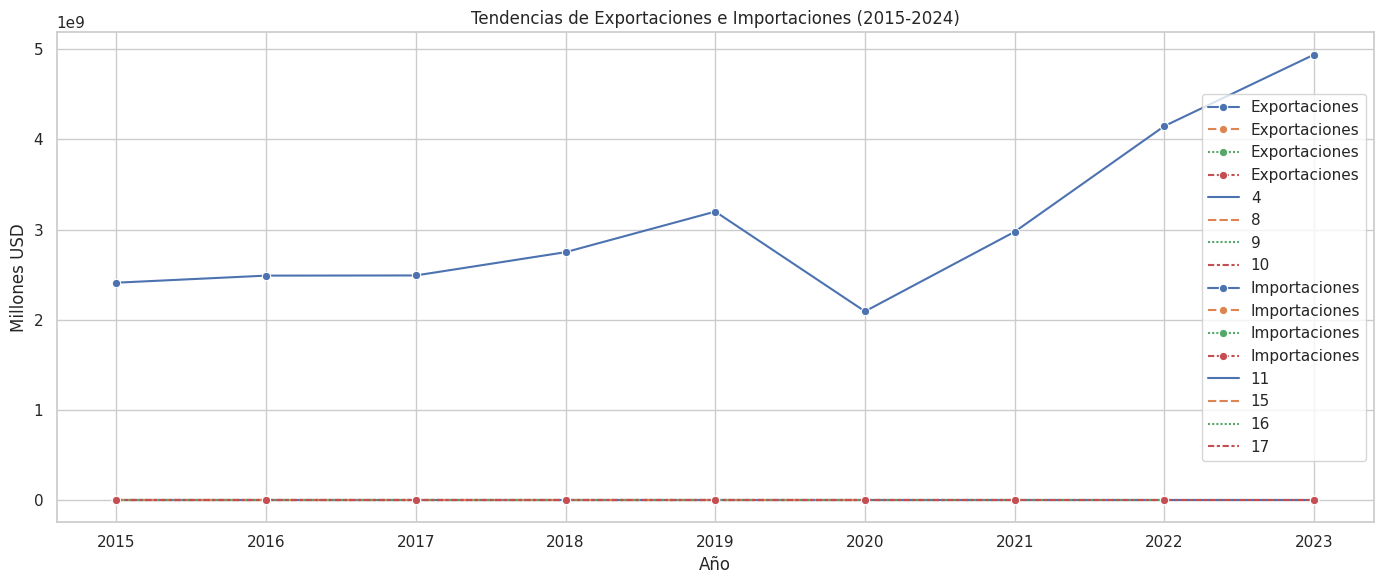

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


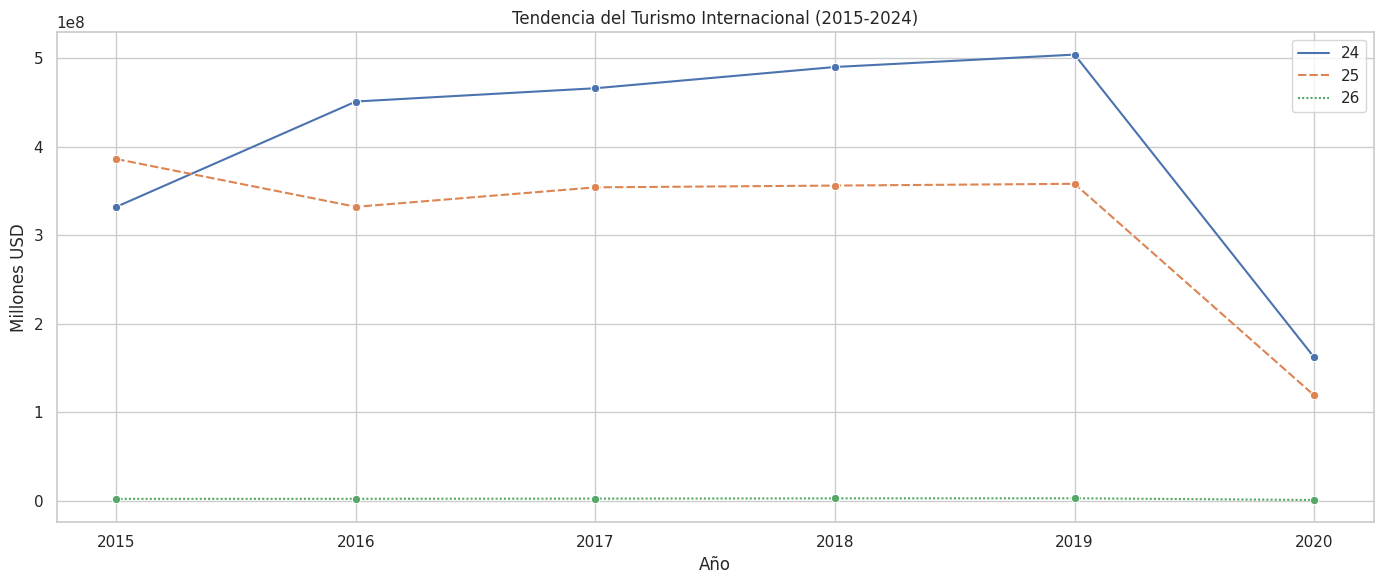

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

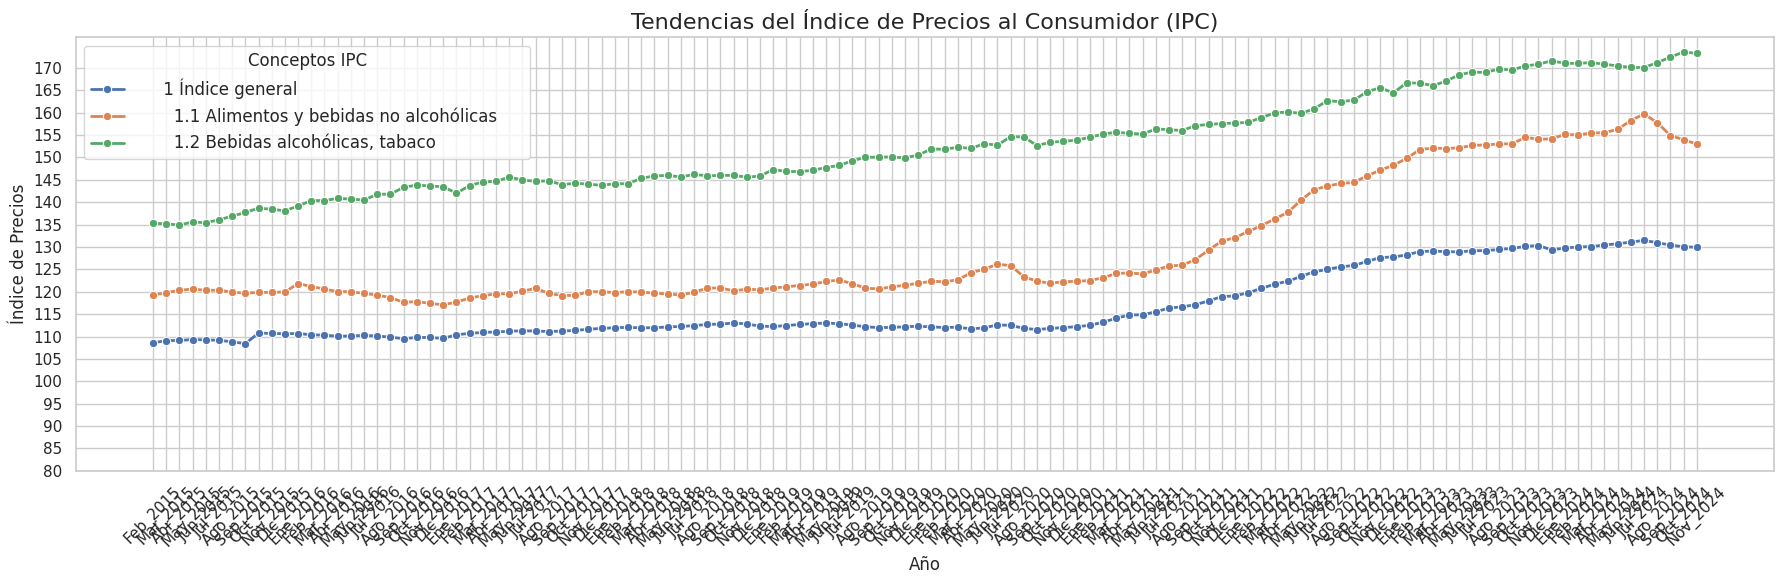

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar datos
DatosBitcoin = pd.read_csv("bitcoin.csv")
DatosValorUSD = pd.read_csv("USD-EUR-2015-2024.csv")
DatosIPC = pd.read_csv("Índice_de_Precios_al_Consumidor_(IPC).csv", skiprows=3)
DatosBancoCentral = pd.read_csv("InfoBancoCentral.csv", skiprows=4)

# Procesar DatosIPC
DatosIPC = DatosIPC.iloc[0:14]  # Seleccionar solo las filas necesarias
new_header = DatosIPC.iloc[0]  # Fila con los nombres de meses
DatosIPC = DatosIPC[1:]  # Eliminar la fila utilizada para el encabezado
DatosIPC.columns = ['Concepto'] + [f"{new_header[i]}" for i in range(1, len(DatosIPC.columns))]
DatosIPC.columns = [
    col.split('_')[0] if 'Unnamed' in col else col for col in DatosIPC.columns
]
anio_base = 2015
meses_columnas = DatosIPC.columns[1:]
columnas_actualizadas = ['Concepto']
for i, mes in enumerate(meses_columnas):
    anio = anio_base + (i // 12)
    columnas_actualizadas.append(f"{mes}_{anio}")
DatosIPC.columns = columnas_actualizadas
for col in DatosIPC.columns[1:]:
    if pd.api.types.is_numeric_dtype(DatosIPC[col]):
        col_mean = DatosIPC[col].mean(skipna=True)
        DatosIPC[col] = DatosIPC[col].fillna(col_mean)
DatosIPC.set_index('Concepto', inplace=True)

# Procesar DatosBancoCentral
DatosBancoCentral = DatosBancoCentral.drop(DatosBancoCentral.columns[4:59], axis=1)
DatosBancoCentral = DatosBancoCentral.iloc[4:27]
DatosBancoCentral = DatosBancoCentral.loc[:,
    (DatosBancoCentral.columns.str.contains('exportaciones|importaciones|turismo', case=False, na=False)) |
    (DatosBancoCentral.columns == 'Indicator Name') |
    (DatosBancoCentral.columns.str.match(r'^\d{4}$'))
]
exportaciones = DatosBancoCentral[DatosBancoCentral['Indicator Name'].str.contains("Exportaciones", case=False, na=False)].copy()
importaciones = DatosBancoCentral[DatosBancoCentral['Indicator Name'].str.contains("Importaciones", case=False, na=False)].copy()
turismo = DatosBancoCentral[DatosBancoCentral['Indicator Name'].str.contains("Turismo", case=False, na=False)].copy()

# Convertir formatos de fecha
DatosBitcoin['date'] = pd.to_datetime(DatosBitcoin['date'])
DatosValorUSD['Month_Year'] = pd.to_datetime(DatosValorUSD['Month_Year'], format='%m-%Y')

# Graficar 1: Tendencia del precio del Bitcoin
plt.figure(figsize=(14, 6))
sns.lineplot(data=DatosBitcoin, x='date', y='price', color='blue')
plt.title('Tendencia del Precio del Bitcoin (2015-2024)')
plt.xlabel('Fecha')
plt.ylabel('Precio del Bitcoin')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Graficar 2: Tendencia del tipo de cambio USD/EUR
plt.figure(figsize=(14, 6))
sns.lineplot(data=DatosValorUSD, x='Month_Year', y='USD_EUR_Exchange_Rate', color='green')
plt.title('Tendencia del Tipo de Cambio USD/EUR (2015-2024)')
plt.xlabel('Fecha')
plt.ylabel('Tipo de Cambio USD/EUR')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Graficar 3: Relación entre exportaciones e importaciones
plt.figure(figsize=(14, 6))
sns.lineplot(data=exportaciones.T[1:], label='Exportaciones', marker='o')
sns.lineplot(data=importaciones.T[1:], label='Importaciones', marker='o')
plt.title('Tendencias de Exportaciones e Importaciones (2015-2024)')
plt.xlabel('Año')
plt.ylabel('Millones USD')
plt.legend()
plt.tight_layout()
plt.show()

# Graficar 4: Tendencia de turismo
plt.figure(figsize=(14, 6))
sns.lineplot(data=turismo.T[1:], marker='o', color='purple')
plt.title('Tendencia del Turismo Internacional (2015-2024)')
plt.xlabel('Año')
plt.ylabel('Millones USD')
plt.tight_layout()
plt.show()

# Graficar 5: Tendencias anuales del IPC (Índice de Precios al Consumidor)

# Aseguramos que el ipc_transpuesto esté en formato adecuado (números flotantes)
ipc_transpuesto = DatosIPC.T.iloc[1:].astype(float)

# Graficar 5:
plt.figure(figsize=(18, 6))  # Ajustar para hacer la gráfica más larga

# Graficar los primeros 3 conceptos (ajustar según sea necesario)
for concepto in ipc_transpuesto.columns[:3]:
    sns.lineplot(data=ipc_transpuesto, x=ipc_transpuesto.index, y=ipc_transpuesto[concepto], label=concepto, marker='o', linewidth=2)

# Ajustar el título, etiquetas y detalles
plt.title('Tendencias del Índice de Precios al Consumidor (IPC)', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Índice de Precios', fontsize=12)
plt.xticks(rotation=45)  # Rotar etiquetas para mejor visibilidad
plt.legend(title='Conceptos IPC', fontsize=12)

# Ajuste de las marcas del eje Y
y_min = ipc_transpuesto.min().min()  # El valor mínimo de todas las columnas
y_max = ipc_transpuesto.max().max()  # El valor máximo de todas las columnas
plt.yticks(range(int(y_min), int(y_max) + 1, 5))  # Ajuste de marcas en Y con intervalos de 5

# Si los valores varían mucho, se puede usar una escala logarítmica (opcional)
# plt.yscale('log')

# Mejorar la visualización con un estilo más elegante
sns.set(style="whitegrid")  # Establecer un estilo limpio de fondo
plt.tight_layout()  # Ajustar para que todo encaje bien en el gráfico
plt.show()